# Análise Global de Resíduos Plásticos: Predição de Riscos de Resíduos Costeiros e Fontes Principais de Produção

Este estudo tem como objetivo analisar os principais parâmetros de **produção de resíduos plásticos** a nível global, com o intuito de identificar as causas subjacentes dessa problemática e avaliar como diferentes países estão lidando com ela. O foco principal está em investigar possíveis **correlações** entre variáveis relacionadas ao desperdício de plástico, com o objetivo de desenvolver **modelos preditivos** para duas áreas-chave:

1. **Risco de resíduos plásticos na costa**: 
   Avaliar os riscos associados ao acúmulo de resíduos plásticos nas regiões costeiras de diferentes países, levando em consideração a quantidade de plástico gerado, as práticas de reciclagem, a gestão de resíduos e outras variáveis relevantes.
  
2. **Identificação das principais fontes de produção de resíduos plásticos**: 
   Analisar as fontes primárias de resíduos plásticos em cada país, buscando entender quais setores, atividades ou comportamentos estão mais diretamente relacionados à geração desses resíduos.

O banco de dados utilizado para este estudo é o [Global Plastic Waste 2023: Country-wise Data](https://www.kaggle.com/datasets/prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis/data)., que contém informações detalhadas sobre a quantidade de resíduos plásticos gerados, reciclados e descartados por país. Através da análise e modelagem desses dados, buscamos identificar padrões e insights que possam ajudar na formulação de estratégias para mitigar o impacto dos resíduos plásticos no meio ambiente e nas comunidades costeiras.

Com base em técnicas de **análise exploratória de dados** e **modelagem preditiva**, a pesquisa visa fornecer uma compreensão mais profunda das dinâmicas globais de resíduos plásticos, contribuindo para o desenvolvimento de políticas públicas mais eficazes  voltadas à sustentabilidade.



### Sobre os dados:

Logo abaixo está uma tablea informativa onde explica com mais detalhes sobre cada variavel de dados coletados.

| Variavel | Especificação | Tipo |
|:---:|:---:|:---:|
| Country | Nome do país. | Object |
| Total_Plastic_Waste_MT | Produção de resíduos plásticos por país em milhões de toneladas métricas. | Float |
| Main_Sources | Principais fontes de resíduos plásticos por país. | Object |
| Recycling_Rate | Taxas nacionais de reciclagem (%). | Float |
| Per_Capita_Waste_KG | Produção de resíduos per capita (kg/pessoa). | Float |
| Coastal_Waste_Risk | Avaliação de risco de resíduos costeiros | Object |

In [617]:
# Importando pacotes e bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

In [552]:
# Lendo o banco de dados
df = pd.read_csv('Plastic Waste Around the World.csv')

# Separando em uma nova variavel os top 30 países
df_best_30 = df.head(30)
df_best_30

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low


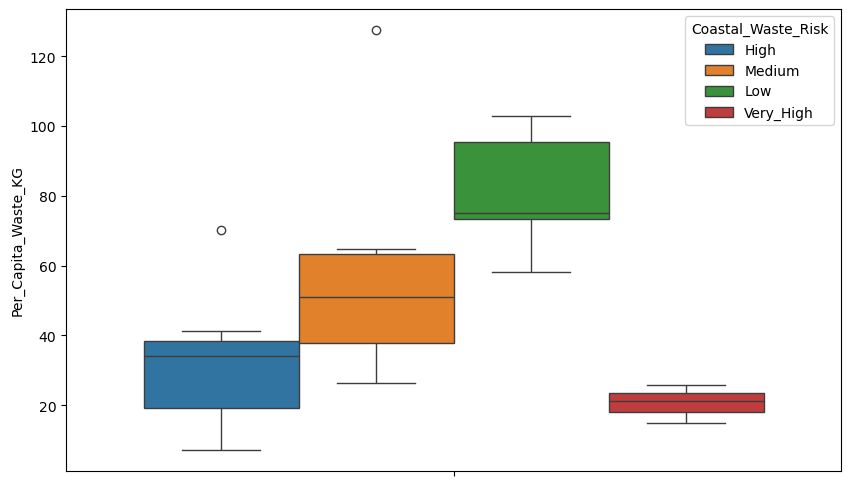

In [652]:
# Criando gráficos boxplot para análises exploratórias

plt.figure(figsize=(10,6))
sns.boxplot(data=df_best_30, y='Per_Capita_Waste_KG', hue='Coastal_Waste_Risk')
plt.xticks(rotation=90)
plt.show()

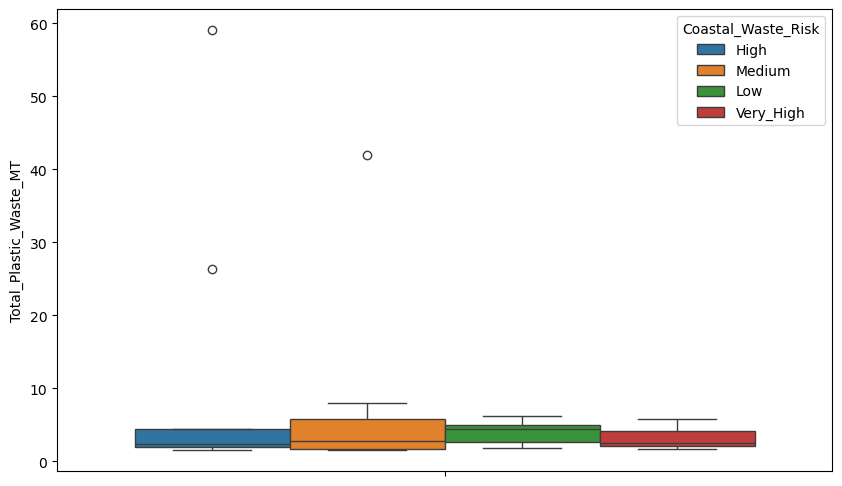

In [556]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_best_30, y='Total_Plastic_Waste_MT', hue='Coastal_Waste_Risk')
plt.xticks(rotation=90)
plt.show()

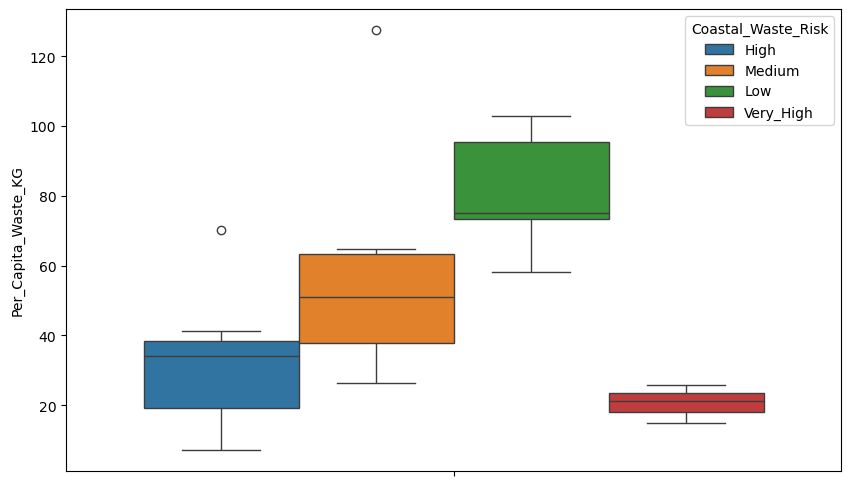

In [558]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_best_30, y='Per_Capita_Waste_KG', hue='Coastal_Waste_Risk')
plt.xticks(rotation=90)
plt.show()

In [560]:
# Verificando se há dados faltantes
df_best_30.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [562]:
df_best_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 30 non-null     object 
 1   Total_Plastic_Waste_MT  30 non-null     float64
 2   Main_Sources            30 non-null     object 
 3   Recycling_Rate          30 non-null     float64
 4   Per_Capita_Waste_KG     30 non-null     float64
 5   Coastal_Waste_Risk      30 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.5+ KB


In [564]:
df_best_30.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,30.000000,30.000000,30.000000
mean,7.224000,23.536667,48.926667
std,12.821937,20.502035,29.154747
min,1.540000,1.200000,7.100000
25%,1.830000,8.575000,26.825000
50%,2.745000,14.750000,42.350000
75%,5.637500,33.900000,64.450000
max,59.080000,84.800000,127.500000


In [566]:
df_best_30.nunique()

Country                   30
Total_Plastic_Waste_MT    30
Main_Sources              10
Recycling_Rate            30
Per_Capita_Waste_KG       29
Coastal_Waste_Risk         4
dtype: int64

### Análise Gráfica

Na etapa seguinte é feita uma análise gráfica com entuito de identifcar padrões e correlações entre dados afim identificar os países com maiores produções de resíduos plásticos, países com boa taxa de reciclagem, onde há mais risco de produção de resíduos na costa, maior produção de resíduos per capita, etc.

### Grafico 1 - Top 30 Países Que Mais Geram Resíduos Plasticos X Risco De Resíduo Costeiro

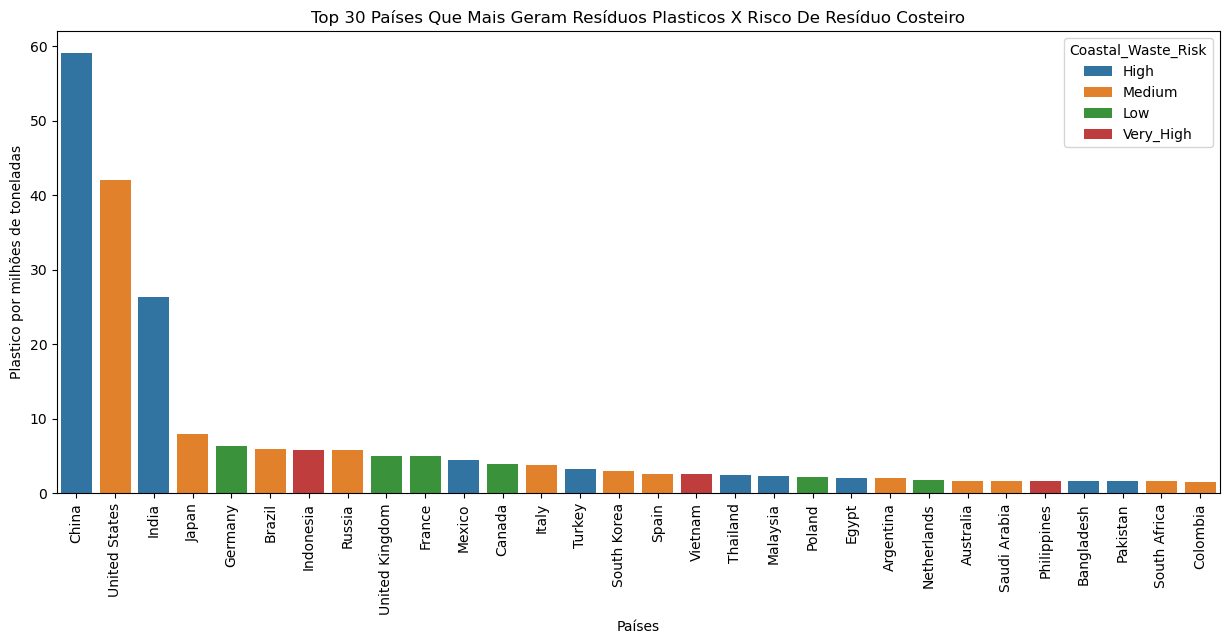

In [569]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_best_30, x='Country', y='Total_Plastic_Waste_MT', hue='Coastal_Waste_Risk')
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.ylabel('Plastico por milhões de toneladas')
plt.title('Top 30 Países Que Mais Geram Resíduos Plasticos X Risco De Resíduo Costeiro')
plt.show()

### Grafico 2 - Risco de resíduos na costa X Principais fontes de resíduo

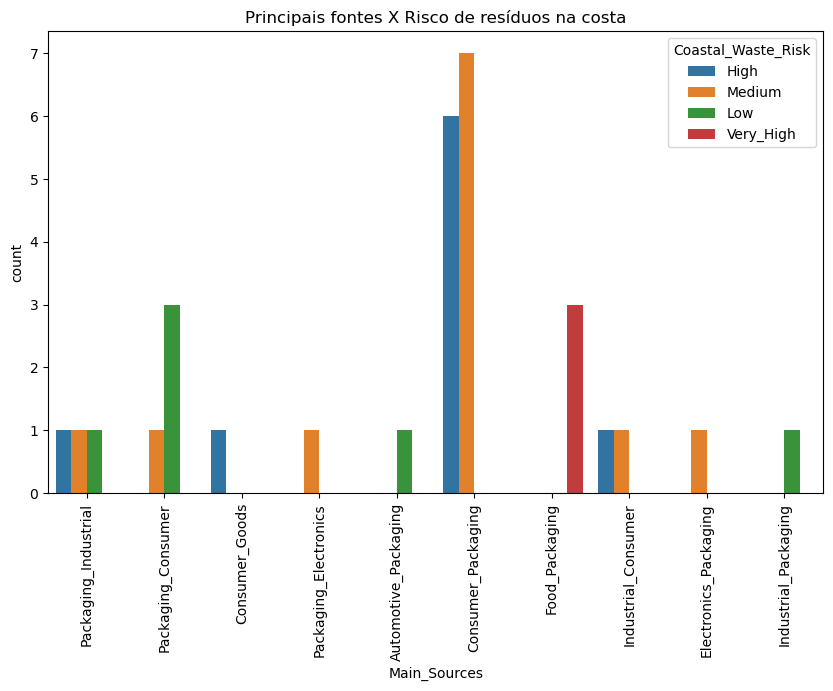

In [571]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_best_30['Main_Sources'], hue=df_best_30['Coastal_Waste_Risk'])
plt.xticks(rotation=90)
plt.title('Principais fontes X Risco de resíduos na costa')
plt.show()

In [573]:
high_risk = df_best_30[df_best_30['Coastal_Waste_Risk'] == 'High']['Coastal_Waste_Risk'].count()
very_high_risk = df_best_30[df_best_30['Coastal_Waste_Risk'] == 'Very_High']['Coastal_Waste_Risk'].count()
medium_risk = df_best_30[df_best_30['Coastal_Waste_Risk'] == 'Medium']['Coastal_Waste_Risk'].count()
low_risk = df_best_30[df_best_30['Coastal_Waste_Risk'] == 'Low']['Coastal_Waste_Risk'].count()

In [575]:
size = [high_risk, very_high_risk, medium_risk, low_risk]
labels = ['High Risk', 'Very High Risk', 'Medium Risk', 'Low Risk']
color = sns.color_palette('Set3', len(labels))

### Grafico 3 - Grafico de Risco de Residuos na Costa

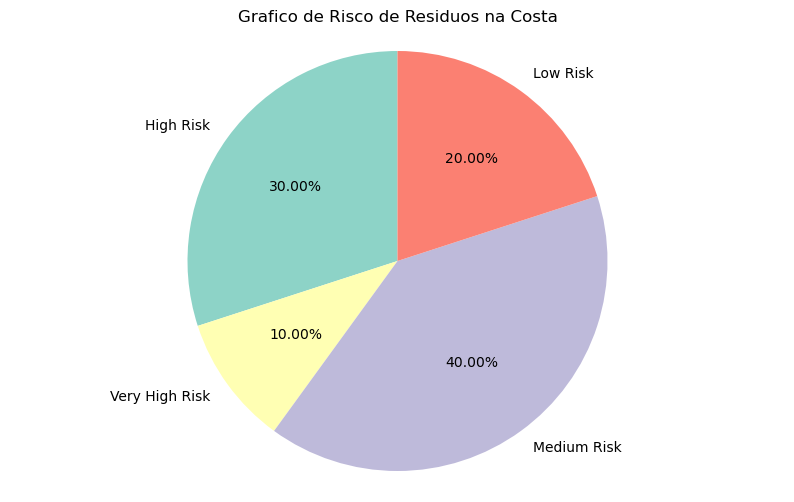

In [577]:
plt.figure(figsize=(10, 6))
plt.pie(size, labels=labels, autopct='%2.2f%%', startangle=90, colors=color)
plt.title('Grafico de Risco de Residuos na Costa')
plt.axis('equal')
plt.show()

### Grafico 4 - Taxa de reciclagem X Produção de resíduos per capita

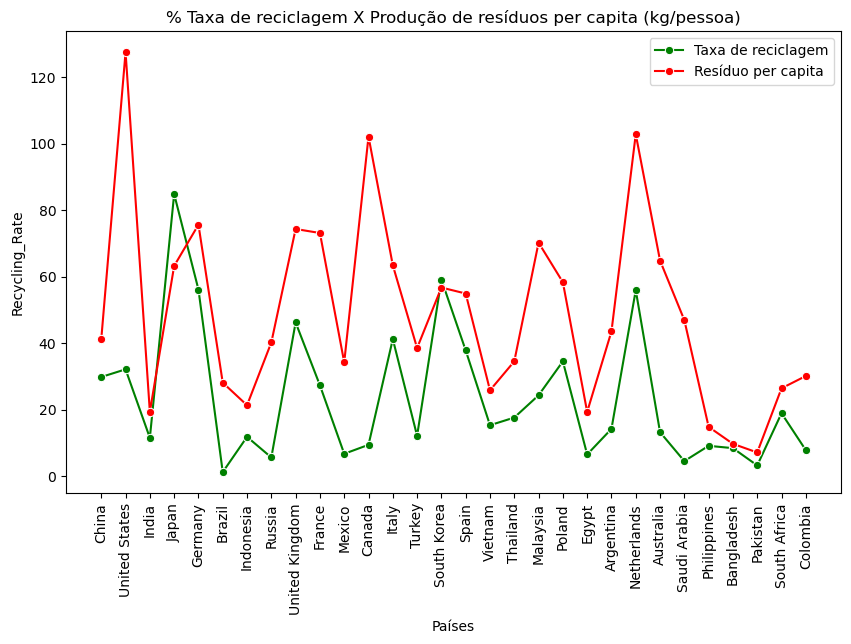

In [644]:
plt.figure(figsize=(10, 6))
sns.lineplot(df_best_30, label='Taxa de reciclagem', x='Country', y='Recycling_Rate', color='green', marker='o')
sns.lineplot(df_best_30, label='Resíduo per capita', x='Country', y='Per_Capita_Waste_KG', color='red', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.title('% Taxa de reciclagem X Produção de resíduos per capita (kg/pessoa)')
plt.legend()
plt.show()

In [581]:
df['Main_Sources_Cat'] = LabelEncoder().fit_transform(df['Main_Sources'])
df['Coastal_Waste_Risk_Cat'] = LabelEncoder().fit_transform(df['Coastal_Waste_Risk'])

### Modelo 1 - Modelo Preditivo De Risco De Resíduos Na Costa

In [658]:
# Separando as variáveis em Features e Target
y = df.Coastal_Waste_Risk_Cat
X = df.drop(columns=['Country', 'Main_Sources', 'Coastal_Waste_Risk', 'Coastal_Waste_Risk_Cat'])

# Separando o DataSet em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [660]:
#Padronizando os dados numéricos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [662]:
# Criando o modelo com RandomForest
model = RandomForestClassifier(random_state=44)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=44)

In [664]:
# Predizendo os valores de X_test
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0])

In [591]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.75      0.43      0.55        14
           2       0.60      0.30      0.40        10

    accuracy                           0.62        42
   macro avg       0.65      0.56      0.56        42
weighted avg       0.64      0.62      0.59        42



In [593]:
cm = confusion_matrix(y_test, y_pred)

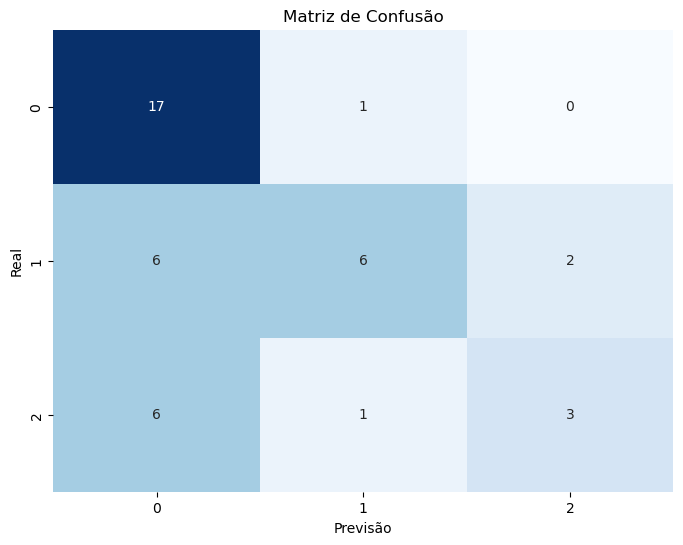

In [595]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [666]:
# Utilização do GridSearchCV Para melhorar a eficacia do modelo
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [670]:
# Fitando novo modelo
model_grid = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=44)
model_grid.fit(X_train_scaled, y_train)

y_pred = model_grid.predict(X_test_scaled)
y_pred

array([0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0])

In [623]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74        18
           1       0.78      0.50      0.61        14
           2       0.60      0.30      0.40        10

    accuracy                           0.64        42
   macro avg       0.66      0.58      0.58        42
weighted avg       0.66      0.64      0.61        42



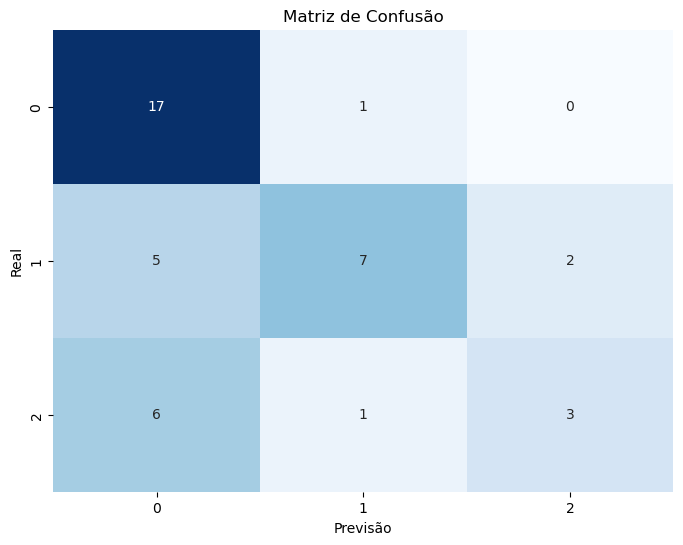

In [625]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

### Modelo 2 - Modelo Preditivo De Principais Fontes De Resíduo Plástico

In [668]:
# Separando as variáveis em Features e Target
y1 = df.Main_Sources_Cat
X1 = df.drop(columns=['Country', 'Main_Sources', 'Coastal_Waste_Risk', 'Main_Sources_Cat'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=45)

In [672]:
#Padronizando os dados numéricos
scaled = StandardScaler()

X1_train_scaled = scaled.fit_transform(X1_train)
X1_test_scaled = scaled.transform(X1_test)

In [674]:
# Criando o modelo com RandomForest
model1 = RandomForestClassifier(random_state=45).fit(X1_train_scaled, y1_train)

In [676]:
# Predizendo os valores de X_test
y1_pred = model1.predict(X1_test_scaled)
y1_pred

array([2, 7, 2, 2, 2, 3, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2])

In [678]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.97      1.00      0.99        34
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.88        42
   macro avg       0.22      0.25      0.23        42
weighted avg       0.84      0.88      0.86        42



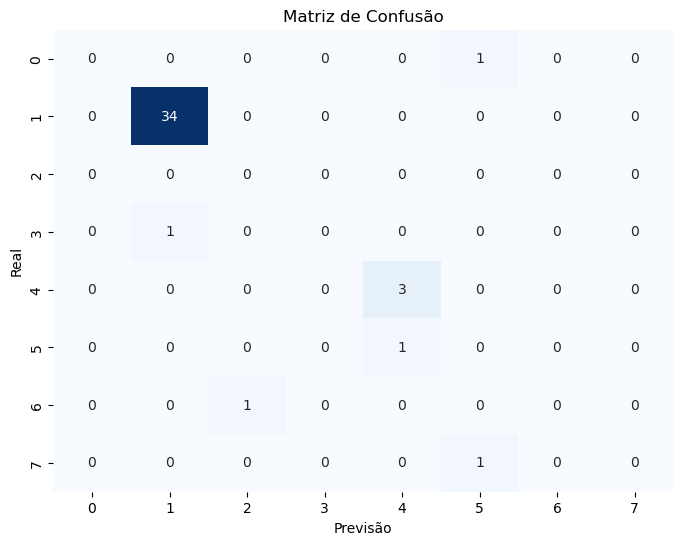

In [609]:
cm1 = confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# Conclusões:

### 1. **Risco de Poluição Costeira**

Como ilustrado no **Gráfico 1**, os países com maior risco de poluição costeira estão principalmente concentrados no Sudeste Asiático. Entre os principais países com esse risco elevado, destacam-se a Indonésia, as Filipinas e o Vietnã. Esses países, apesar de não serem os maiores produtores de resíduos plásticos, enfrentam sérios desafios no que se refere à poluição das suas costas.

### 2. **Fontes de Resíduos Plásticos**

O **Gráfico 2** oferece uma visão clara das principais fontes de resíduos plásticos no mundo, além de destacar o risco que cada uma dessas fontes representa para a poluição costeira. Observamos que os pacotes de comida são a principal fonte de resíduos plásticos, sendo responsáveis por uma grande parte da poluição nas regiões costeiras.

### 3. **Produção de Resíduos Per Capita vs. Taxa de Reciclagem**

Ao comparar a produção de resíduos per capita com a taxa de reciclagem de cada país, é possível identificar padrões interessantes. Embora a China seja o maior produtor de resíduos plásticos em termos absolutos, sua produção per capita é relativamente baixa em comparação com países como os Estados Unidos. Isso sugere que, enquanto a China gera grandes volumes de resíduos industriais, os Estados Unidos enfrentam uma produção considerável de resíduos de consumo final. Esse contraste é relevante para compreender os diferentes perfis de resíduos em cada país e suas implicações na gestão e reciclagem desses materiais.

### 4. **Modelos Preditivos**

Foram desenvolvidos dois modelos preditivos para analisar os dados:

- O **primeiro modelo**, que prevê os riscos de poluição costeira para cada país, alcançou uma acurácia explicativa de **64%**.
- O **segundo modelo**, que identifica as principais fontes de poluição, obteve uma acurácia explicativa de **88%**.

Ambos os modelos foram construídos utilizando a técnica **Random Forest**, escolhida por sua robustez contra overfitting, escalabilidade e capacidade de lidar com grandes volumes de dados e múltiplas variáveis. Além disso, a interpretação dos resultados globais é relativamente simples, o que torna essa abordagem muito útil para a análise e previsão de tendências.

### 5. **Considerações Finais**

Através dos modelos preditivos e da análise detalhada dos dados, foi possível identificar padrões importantes na produção e no gerenciamento de resíduos plásticos ao redor do mundo. A combinação de dados sobre a produção de resíduos, suas fontes e os riscos associados à poluição costeira pode fornecer informações valiosas para a formulação de políticas públicas e ações globais no combate à poluição plástica.